In [ ]:
from keras.models import load_model

classifier = load_model('/content/drive/MyDrive/Model/face.h5')


Class - chris_hemsworth


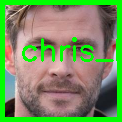


Class - chris_evans


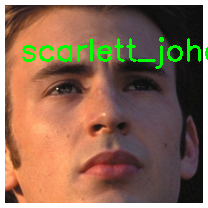


Class - robert_downey_jr


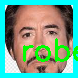


Class - scarlett_johansson


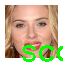


Class - chris_evans


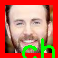


Class - scarlett_johansson


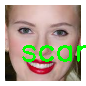


Class - mark_ruffalo


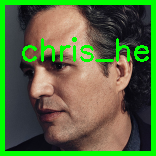


Class - chris_evans


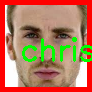


Class - robert_downey_jr


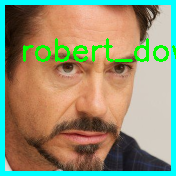


Class - chris_evans


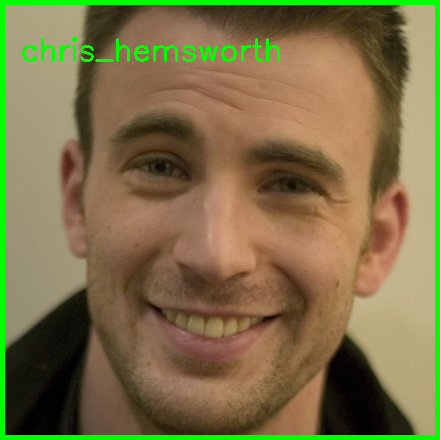

In [ ]:
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
from google.colab.patches import cv2_imshow

Face_dict = {"[4]": "scarlett_johansson",
                  "[3]": "robert_downey_jr",
                  "[2]": "mark_ruffalo",
                  "[1]": "chris_hemsworth", 
                  "[0]": "chris_evans"}                

Face_dict_n = {"scarlett_johansson": "scarlett_johansson",
                    "robert_downey_jr": "robert_downey_jr",
                    "mark_ruffalo": "mark_ruffalo",
                    "chris_hemsworth": "chris_hemsworth",
                    "chris_evans": "chris_evans"
                   }

def draw_test(name, pred, im):
    t = Face_dict[str(pred)]
    color_dict = {'[0]': (0,0,255), '[1]': (0,255,0), '[2]': (255,0,0), '[3]': (255,255,0), '[4]': (255,255,255)}
    expanded_image = cv2.copyMakeBorder(im, 5, 5, 5, 5 ,cv2.BORDER_CONSTANT,value=color_dict[str(pred)])
    cv2.putText(expanded_image, t, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2_imshow(expanded_image)

def getRandomImage(path):
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    print("\nClass - " + Face_dict_n[str(path_class)])
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    return cv2.imread(file_path+"/"+image_name)    

for i in range(0,10):
    input_im = getRandomImage("/content/drive/MyDrive/Data Set/testing/")
    input_original = input_im.copy()
    input_original = cv2.resize(input_original, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)
    
    input_im = cv2.resize(input_im, (32, 32), interpolation = cv2.INTER_LINEAR)
    input_im = input_im / 255.
    input_im = input_im.reshape(1,32,32,3) 
    
    res = np.argmax(classifier.predict(input_im, 1, verbose = 0), axis=1)
    
    draw_test("Prediction", res, input_original)